#**Gradient Boosting**

#**Loading common libraries**

In [68]:
import pandas as pd
import numpy as np

In [69]:
# Regression metrics
from sklearn.metrics import mean_squared_error

# Classification metrics
from sklearn.metrics import accuracy_score

#**Load datasets**

#**Load datasets for classification**

In [70]:
# read the train and test dataset
class_train_data = pd.read_csv('https://raw.githubusercontent.com/vamsivarma/datasets/master/machine_learning/logistic_regression/train.csv')
class_test_data = pd.read_csv('https://raw.githubusercontent.com/vamsivarma/datasets/master/machine_learning/logistic_regression/test.csv')

# shape of the dataset
print('Shape of classification training data :', class_train_data.shape)
print('Shape of classification testing data :', class_test_data.shape)

Shape of classification training data : (712, 25)
Shape of classification testing data : (179, 25)


Separating the target variable (or column) which we want to predict using ML algorithms

In [71]:
# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
class_train_x = class_train_data.drop(columns=['Survived'],axis=1)
class_train_y = class_train_data['Survived']

# seperate the independent and target variable on testing data
class_test_x = class_test_data.drop(columns=['Survived'],axis=1)
class_test_y = class_test_data['Survived']

class_train = pd.DataFrame(columns=['Train'])
class_train['Train'] = class_train_y

class_test = pd.DataFrame(columns=['Test'])
class_test['Test'] = class_test_y

#**Load datasets for Regression**

In [72]:
# These datasets are used for following algorithms
# Linear regression

# read the train and test dataset
reg_train_data = pd.read_csv('https://raw.githubusercontent.com/vamsivarma/datasets/master/machine_learning/linear_regression/train.csv')
reg_test_data = pd.read_csv('https://raw.githubusercontent.com/vamsivarma/datasets/master/machine_learning/linear_regression/test.csv')

# shape of the dataset
print('\nShape of regression training data :', reg_train_data.shape)
print('\nShape of regression testing data :', reg_test_data.shape)


Shape of regression training data : (1364, 36)

Shape of regression testing data : (341, 36)


Separating the target variable (or column) which we want to predict using ML algorithms

In [73]:
# Now, we need to predict the missing target variable in the test data
# target variable - Item_Outlet_Sales
# seperate the independent and target variable on training data
reg_train_x = reg_train_data.drop(columns=['Item_Outlet_Sales'], axis=1)
reg_train_y = reg_train_data['Item_Outlet_Sales']

# seperate the independent and target variable on training data
reg_test_x = reg_test_data.drop(columns=['Item_Outlet_Sales'], axis=1)
reg_test_y = reg_test_data['Item_Outlet_Sales']

reg_train = pd.DataFrame(columns=['Train'])
reg_train['Train'] = reg_train_y

reg_test = pd.DataFrame(columns=['Test'])
reg_test['Test'] = reg_test_y

In [74]:
## Data frames for saving prediction of different algorithms
col_list = ['GBM']

# Classification predictions for train and test set
class_train_pred = pd.DataFrame(columns = col_list)
class_test_pred = pd.DataFrame(columns = col_list)

# Regression predictions for train and test set
reg_train_pred = pd.DataFrame(columns = col_list)
reg_test_pred = pd.DataFrame(columns = col_list)

#**Gradient Boosting (GBM)**

In [75]:
import sklearn.ensemble 
dir(sklearn.ensemble)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'HistGradientBoostingClassifier',
 'HistGradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'StackingClassifier',
 'StackingRegressor',
 'VotingClassifier',
 'VotingRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bagging',
 '_base',
 '_forest',
 '_gb',
 '_gb_losses',
 '_gradient_boosting',
 '_hist_gradient_boosting',
 '_iforest',
 '_stacking',
 '_voting',
 '_weight_boosting']

In [76]:
help(sklearn.ensemble.GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a single regression tree is in

#**Classification**

In [77]:
# importing required libraries
from sklearn.ensemble import GradientBoostingClassifier

'''
Create the object of the GradientBoosting Classifier model
You can also add other parameters and test your code here
Some parameters are : learning_rate, n_estimators
Documentation of sklearn GradientBoosting Classifier: 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
'''
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)

# fit the model with the training data
model.fit(class_train_x, class_train_y)

# predict the target on the train dataset
predict_train = model.predict(class_train_x)
#print('\nTarget on train data',predict_train) 

# Save predictions
class_train_pred['GBM'] = predict_train

# Accuray Score on train dataset
accuracy_train = accuracy_score(class_train_y, predict_train)
print('\nAccuracy of Gradient boosting on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(class_test_x)
#print('\nTarget on test data',predict_test) 

# Save predictions
class_test_pred['GBM'] = predict_test

# Accuracy Score on test dataset
accuracy_test = accuracy_score(class_test_y, predict_test)
print('\nAccuracy of Gradient boosting on test dataset : ', accuracy_test)


Accuracy of Gradient boosting on train dataset :  0.9550561797752809

Accuracy of Gradient boosting on test dataset :  0.8324022346368715


In [78]:
class_test_pred.head()

,GBM
0,0
1,0
2,0
3,1
4,1


In [79]:
class_train_y.head()

0    0
1    1
2    1
3    0
4    0
Name: Survived, dtype: int64

#**Regression**

In [80]:
# importing required libraries
from sklearn.ensemble import GradientBoostingRegressor

'''
Create the object of the GradientBoosting Classifier model
You can also add other parameters and test your code here
Some parameters are : learning_rate, n_estimators
Documentation of sklearn GradientBoosting Classifier: 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
'''
model = GradientBoostingRegressor(n_estimators=100,max_depth=5)

# fit the model with the training data
model.fit(reg_train_x, reg_train_y)

# predict the target on the train dataset
predict_train = model.predict(reg_train_x)
#print('\nTarget on train data',predict_train) 

# Save predictions
reg_train_pred['GBM'] = predict_train

# Root Mean Squared Error on training dataset
rmse_train = mean_squared_error(reg_train_y, predict_train)**(0.5)
print('\nRMSE for Gradient boosting on train dataset : ', rmse_train)

# predict the target on the testing dataset
predict_test = model.predict(reg_test_x)

# Save predictions
reg_test_pred['GBM'] = predict_test

# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(reg_test_y, predict_test)**(0.5)
print('\nRMSE for Gradient boosting on test dataset : ', rmse_test)


RMSE for Gradient boosting on train dataset :  671.6430765426803

RMSE for Gradient boosting on test dataset :  1048.158950560606


In [81]:
class_train_pred.head() 

,GBM
0,0
1,1
2,1
3,0
4,0


In [82]:
class_test_pred.head()

,GBM
0,0
1,0
2,0
3,1
4,1


In [83]:
reg_train_pred.head()

,GBM
0,769.731632
1,1821.933627
2,2590.990847
3,-77.035622
4,2044.213824


In [84]:
reg_test_pred.head()

,GBM
0,1420.436207
1,3244.794085
2,2251.008256
3,2765.135625
4,2620.275402


In [85]:
# Save original data
class_train.to_csv('class_train.csv', sep='\t', index=False)

class_test.to_csv('class_test.csv', sep='\t', index=False)

reg_train.to_csv('reg_train.csv', sep='\t', index=False)

reg_test.to_csv('reg_test.csv', sep='\t', index=False)

In [86]:
#Export predictions to csv, delimit by tab

class_train_pred.to_csv('class_train_pred.csv', sep='\t', index=False)

class_test_pred.to_csv('class_test_pred.csv', sep='\t', index=False)

reg_train_pred.to_csv('reg_train_pred.csv', sep='\t', index=False)

reg_test_pred.to_csv('reg_test_pred.csv', sep='\t', index=False)

#**Homeworks**

1) Try to apply XGBoost to this colab data and compare results and execution times. Is XGBoost faster and more accurate as the theory states? 

Hint: try to use Scikit-Learn or other libraries (Tensorflow?) 

In [87]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=reg_train_x,label=reg_train_y)


In [88]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [89]:
xg_reg.fit(reg_train_x,reg_train_y)

[01:29:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5)

In [90]:
preds_xgbr = xg_reg.predict(reg_test_x)

In [91]:
rmse_test_xgbr = mean_squared_error(reg_test_y, preds_xgbr)**(0.5)
rmse_test_xgbr

1032.5286939810655

In [92]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10,'n_estimators' : 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [93]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2678.115153,44.247841,2678.390788,97.625741
1,2500.383708,43.098289,2501.536865,104.471478
2,2329.819499,52.102037,2335.612468,95.172862
3,2194.127116,53.101816,2201.402995,96.370213
4,2043.839356,45.541398,2059.671794,101.159340


In [94]:
print((cv_results["test-rmse-mean"]).min())

1163.446696


In [95]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


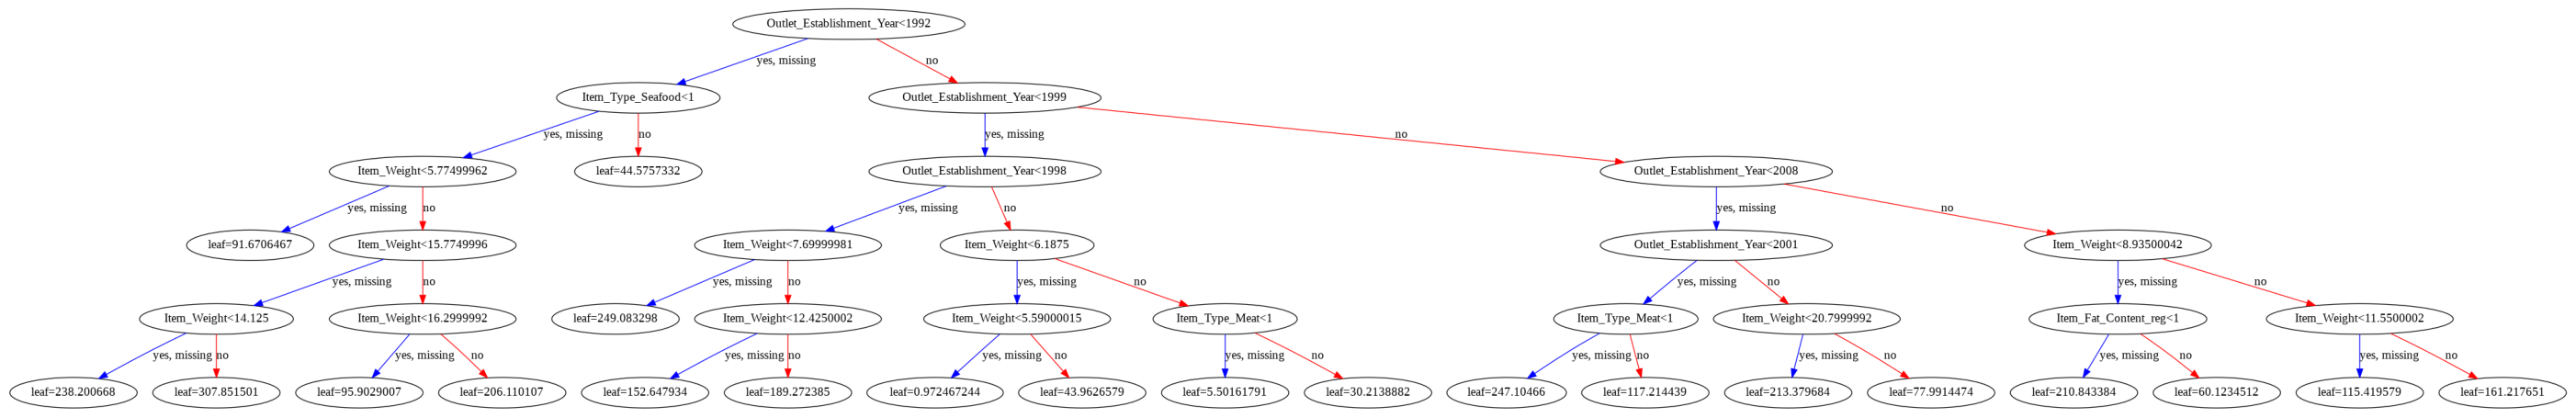

In [96]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=1)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [97]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

model_rf.fit(reg_train_x,reg_train_y)

RandomForestRegressor()

In [98]:
pred_rf = model_rf.predict(reg_test_x)

In [99]:
rmse_test_rf = mean_squared_error(reg_test_y, pred_rf)**(0.5)
rmse_test_rf

1073.5362993336937